In [1]:
#подключим нужные библиотеки и читаем данные
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
import hashlib
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
data = pandas.read_csv("hetmData.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = data[data.lan!=0][data.lon!=0]

In [3]:
dataproceesed = data.drop(data.columns[2], axis=1)


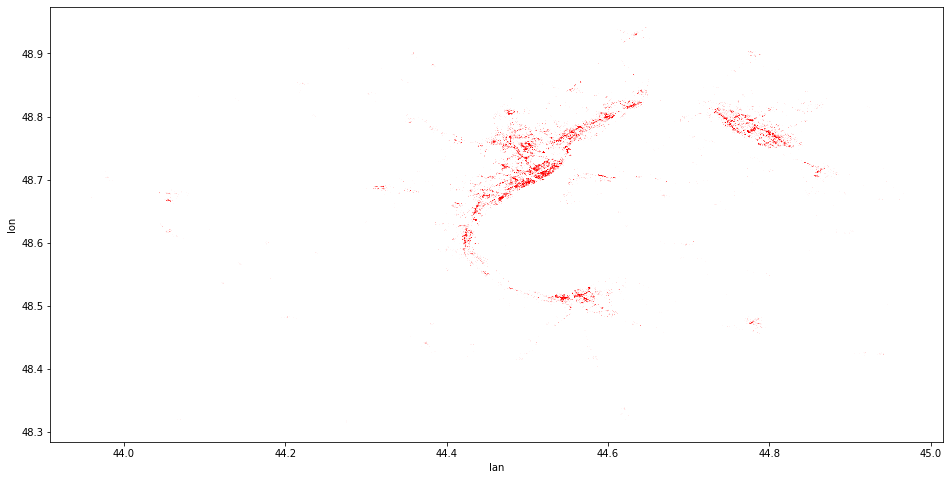

In [4]:
dataproceesed.plot(kind="scatter", x=0, y=1, alpha=1,s= 0.0001,figsize=(16, 8), c="r")

plt.savefig('vlg_all.png',dpi = 1000)

In [5]:
# data2 = data[data.lan<0][data.lon<0][data.lan>0][data.lon>0]
data2 = dataproceesed[dataproceesed.lan<44.5644][dataproceesed.lon<48.7243][dataproceesed.lan>44.4970][dataproceesed.lon>48.6993]

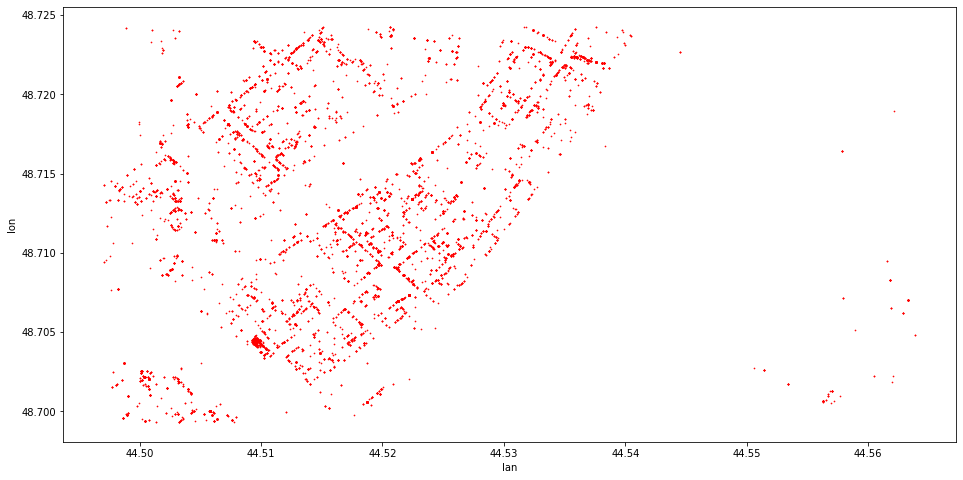

In [6]:
data2.plot(kind="scatter", x=0, y=1, alpha=1,s= 0.45,figsize=(16, 8), c="r")

plt.savefig('vlg_volggtu.png',dpi = 1000)

In [7]:
test_set = dataproceesed#[:10000]

In [8]:
# data3 = dataproceesed.copy(deep=True)
data3 = test_set.copy(deep=True)
data3 = data3.reset_index()
data3.head(3)

,index,lan,lon
0,0,44.353243,48.791494
1,1,44.354418,48.791810
2,2,44.353294,48.791508


In [9]:
data3['forHeatMap'] = 0
data3.head(3)

,index,lan,lon,forHeatMap
0,0,44.353243,48.791494,0
1,1,44.354418,48.791810,0
2,2,44.353294,48.791508,0


In [10]:
data3["lan"][2942:2944]

2942    44.547946
2943    44.497981
Name: lan, dtype: float64

In [11]:
data3.tail()

,index,lan,lon,forHeatMap
91363,92328,44.496257,48.689862,0
91364,92329,44.532074,48.718698,0
91365,92330,44.588192,48.795064,0
91366,92331,44.518179,48.705492,0
91367,92332,44.625935,48.824598,0


In [12]:
len(data3)

91368

In [13]:
def degenerate(df,tocount, targeted_lan, targeted_lon):
    aPlu = targeted_lan+tocount
    aMIn = targeted_lan-tocount
    oPlu = targeted_lon+tocount
    oMin  =targeted_lon-tocount

    dataVremenno = df[df.lan<aPlu][df.lon<oPlu][df.lan>aMIn][df.lon>oMin]
    # dataVremenno.plot(kind="scatter", x=0, y=1, alpha=1,s= 0.45,figsize=(16, 10), c="r")# это если хотим заплотить те организации, которые считались 
    return len(dataVremenno)

# print(degenerate(data3,0.00375,44.5144,48.7243 ))


howManyMetersInSquare = 250
tocount = 0.0000125*howManyMetersInSquare

def heatmap(ddd):
    orgs = len(ddd)
    i=0
    while i < orgs:
        try:
            targeted_lan = ddd["lan"][i]
            targeted_lon = ddd["lon"][i]
            amount = degenerate(ddd,tocount,targeted_lan,targeted_lon )

        except:
            print(i)
            pass
        yield amount
        i += 1
        
    
maxx = 0   
i = 0
for each in heatmap(data3):
    data3["forHeatMap"][i] = int(each)
    i+=1
#     if maxx < i :
#         maxx = i



# for i in heatmap(data3):
#     data3["forHeatMap"][i] = int(i)
#     if maxx < i :
#         maxx = i


        
print(maxx)

0


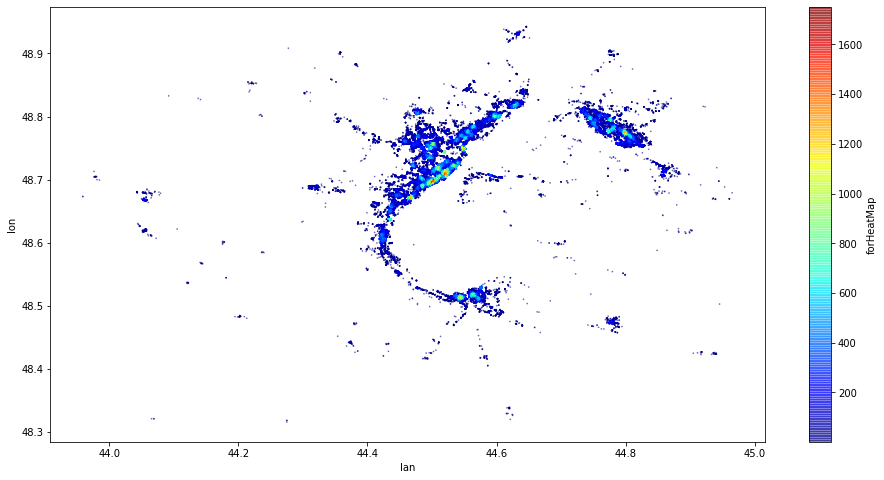

In [14]:
data3.plot(kind="scatter", x=1, y=2, alpha=0.5,s=0.5,figsize=(16, 8),c="forHeatMap", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False,)
plt.savefig('vlg_heat.png',dpi = 1000)

In [15]:
# data2 = data[data.lan<0][data.lon<0][data.lan>0][data.lon>0]
data4 = data3[data3.lan<44.5644][data3.lon<48.7243][data3.lan>44.4970][data3.lon>48.6993]

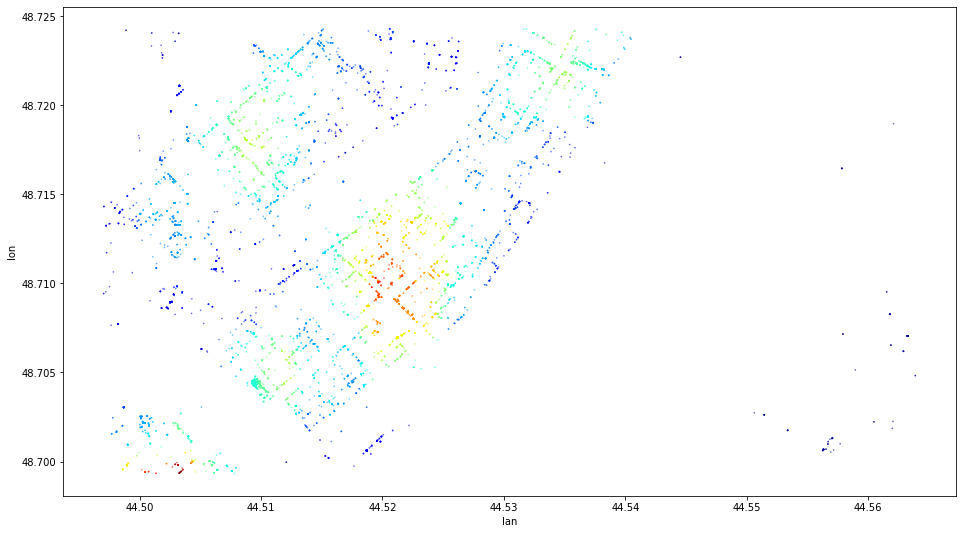

In [16]:
data4.plot(kind="scatter", x=1, y=2, alpha=0.5,s=0.5,figsize=(16,9),c="forHeatMap", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False,)
plt.savefig('volggtu_heat.png',dpi = 1000)

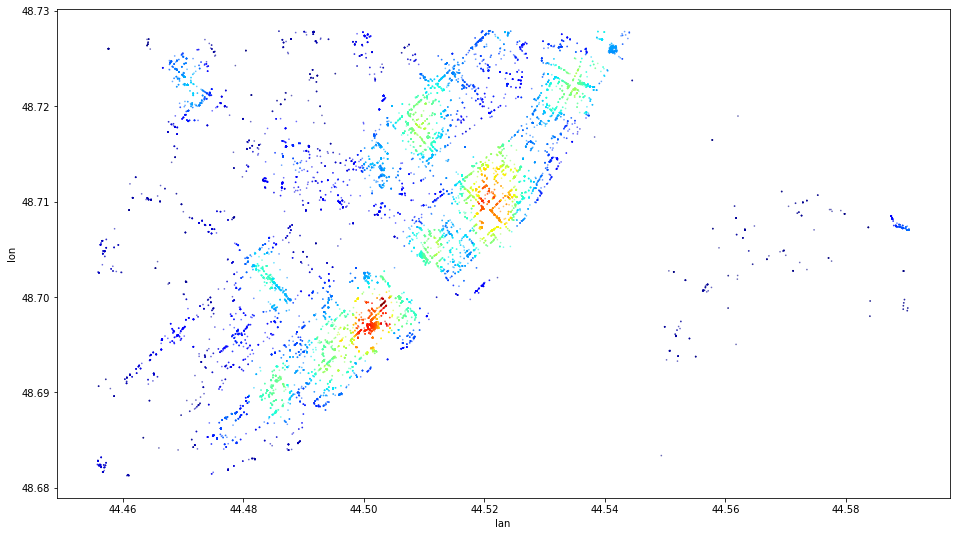

In [17]:

data5 = data3[data3.lan<44.5905][data3.lon<48.7279][data3.lan>44.4557][data3.lon>48.6812]
data5.plot(kind="scatter", x=1, y=2, alpha=0.5,s=0.5,figsize=(16,9),c="forHeatMap", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False,)
plt.savefig('центральныйиворошиловскийхитмап.png',dpi = 1000)

44.5175
48.7069
0.0025
372


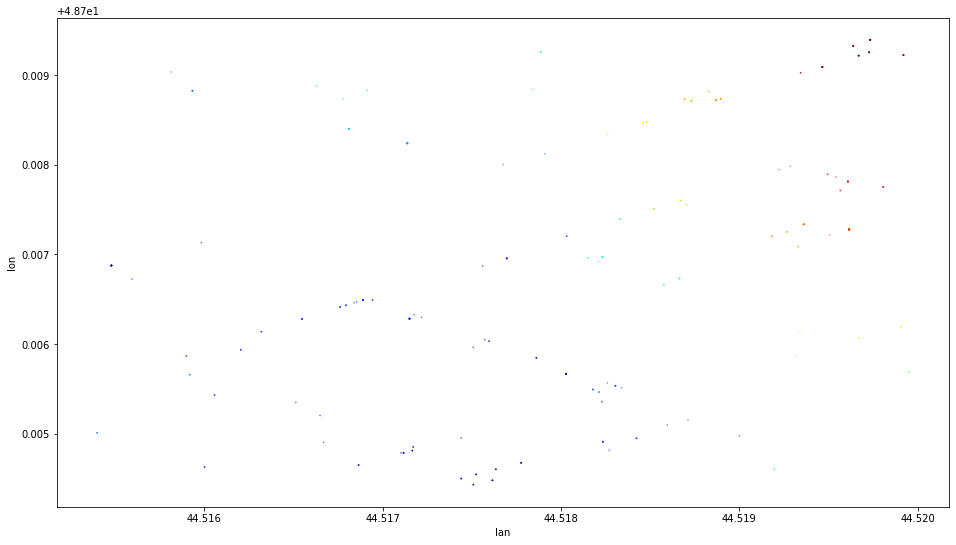

In [29]:
def degenerate2(df,tocount, targeted_lan, targeted_lon):
    aPlu = targeted_lan+tocount
    aMIn = targeted_lan-tocount
    oPlu = targeted_lon+tocount
    oMin  =targeted_lon-tocount

    dataVremenno = df[df.lan<aPlu][df.lon<oPlu][df.lan>aMIn][df.lon>oMin]
    dataVremenno.plot(kind="scatter", x=1, y=2, alpha=0.5,s=0.5,figsize=(16,9),c="forHeatMap", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False,)# это если хотим заплотить те организации, которые считались 
    return len(dataVremenno)



howManyMetersInSquare = 200
inc_num = 21000
targeted_lon, targeted_lan = 48.7069,44.5175


tocount = 0.0000125*howManyMetersInSquare
# targeted_lan = data3["lan"][inc_num]
# targeted_lon = data3["lon"][inc_num]





print(targeted_lan)
print(targeted_lon)
print(tocount)

print(degenerate2(data3,tocount,targeted_lan,targeted_lon))

In [29]:

data3[2000:2005]

,index,lan,lon,forHeatMap
2000,2000,44.486774,48.744214,21
2001,2001,44.824731,48.769250,49
2002,2002,44.546361,48.753327,83
2003,2003,44.589564,48.702718,8
2004,2004,44.523651,48.813692,9


In [30]:
# heatmap, xedges, yedges = np.histogram2d(data3["lan"], data3["lon"], bins=20)



# x = data3.as_matrix(columns=data3["lan"]) 

# y = data3.as_matrix(columns=data3["lon"]) 



x = np.random.randn(100)

y = np.random.randn(10000)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=20)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.imshow(heatmap.T, extent=extent, origin='lower')

ValueError: operands could not be broadcast together with shapes (100,) (10000,) 

In [ ]:
print(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data from CSV
X_dat =  data3[:,0]
Y_dat =  data3[:,1]
Z_dat =  data3[:,2]

# Convert from pandas dataframes to numpy arrays
X, Y, Z, = np.array([]), np.array([]), np.array([])
for i in range(len(X_dat)):
        X = np.append(X, X_dat[i])
        Y = np.append(Y, Y_dat[i])
        Z = np.append(Z, Z_dat[i])

# create x-y points to be used in heatmap
xi = np.linspace(X.min(), X.max(), 1000)
yi = np.linspace(Y.min(), Y.max(), 1000)

# Interpolate for plotting
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = 3
zmax = 100
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.show()

In [ ]:
data3.head(9)

In [ ]:
# howManyMetersInSquare = 200
# tocount = 0.0000125*howManyMetersInSquare

# orgs = len(data3)

# for each in range(orgs):
#     targeted_lan = dataproceesed[["lan"]][each:each+1]
#     targeted_lon = dataproceesed[["lon"]][each:each+1]
# #     targeted_lan = 44.5144
# #     targeted_lon = 48.7243
#     aPlu = targeted_lan+tocount
#     aMIn = targeted_lan-tocount
#     oPlu = targeted_lon+tocount
#     oMin  =targeted_lon-tocount

#     dataVremenno = dataproceesed[dataproceesed.lan<aPlu][dataproceesed.lon<oPlu][dataproceesed.lan>aMIn][dataproceesed.lon>oMin]

#     amount = len(dataVremenno)

#     data3[["forHeatMap"]][each:each+1] = amount